# 120 Years of Olympics History: Exploratory Data Analysis

## Introduction

This is a Exploratory Data Analysis project to analyze the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. The dataset is collected from [here](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results). This analysis provides an opportunity to ask questions about how the Olympics have evolved over time, including the participation and performance of women, different nations, and different sports and events.

## About the Dataset

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA

The file noc_regions.csv contains 230 rows and 3 columns. Each row corresponds to an individual region. The columns are:
1. NOC (National Olympic Committee 3 letter code)
2. region
3. notes

## 1. Importing the Required Python Libraries

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

## 2. Importing the required Datasets

In [4]:
df = pd.read_csv('data/athlete_events.csv')
region_df = pd.read_csv('data/noc_regions.csv')

**2.1** Testing the imported data working properly or not

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**2.2** Checking the number of rows and columns are matching the data source or not

In [6]:
df.shape

(271116, 15)

In [7]:
region_df.shape

(230, 3)

## 3. Cleaning the data

**3.1** Filtering the data only for "Summer"

In [8]:
df = df[df['Season'] == 'Summer']

**3.2** Now we can see that this data table does not contain region column. So, we need to merge the "region_df" column to the "df" column using left join.

In [9]:
df = df.merge(region_df, on = 'NOC', how = 'left')

**3.3** Checking any duplicate values is present or not in the "df" table

In [10]:
df.duplicated().sum() 

1385

**3.4** Removing all the duplicates from the dataset

In [11]:
df.drop_duplicates(inplace=True)

**3.5** Now checking the previous operation

In [12]:
df.duplicated().sum()

0

**3.6** Splitting the "Medal" col into 3 cols - Gold, Bronze, Silver for better analysis

In [13]:
pd.get_dummies(df['Medal'], dtype = int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


**3.7** Now adding this table to the "df" table

In [14]:
df = pd.concat([df, pd.get_dummies(df['Medal'], dtype = int)], axis = 1)

**3.8 Problem Detected with the Dataset:**

In [15]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


**3.9 Problem Explanation via example:** Like, in Hockey there are 11 players and this is a team event it is counting 11 gold per head which is wrong. To solve this problem, we need to remove duplicate on the basis of Team, NOC, Games, Year, City altogether where all the values are same then we drop that column.

In [16]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


**3.10 Fixing the problem**

In [17]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year','City','Sport','Event','Medal'])
medal_tally = medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,AHO,0,1,0,1
226,LBR,0,0,0,0
227,LCA,0,0,0,0
228,LES,0,0,0,0


**3.11 After cleaning the data the no. of rows and cols will be:**

In [18]:
df.shape

(221167, 20)

## 4. Exploratory Data Analysis

**4.1** How many unique Regions are there in the dataset?

In [19]:
df['region'].unique().shape

(206,)

**4.2** In each category, how many medals did the winners win?

In [20]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

**4.3** In which years were the Olympic Games organized?

In [21]:
years = df['Year'].unique().tolist()
years.sort()
years.insert(0, 'Overall')
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

**4.4** Which countries participated in the Olympic games to date?

In [22]:
country = np.unique(df['region'].dropna().values).tolist()
country.sort()
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

**4.5** What is the overall medal tally by region?

In [23]:
def fetch_medal_tally(year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == year]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    return x

fetch_medal_tally(year='Overall', country='Overall')

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


**4.6** What is the medal tally of India?

In [24]:
fetch_medal_tally(year=2016, country='India')

,region,Gold,Silver,Bronze,total
0,India,0,1,1,2


**4.7** How many Olympic games had been organized to date?

In [25]:
df['Year'].unique().shape[0] - 1
# -1 to not to count 1906 game because it is not being counted as an Olympic Game

28

**4.8** In which cities the Olympic games had been organized?

In [26]:
df['City'].unique().shape[0]

23

**4.9** How many sports are being played in the Olympics?

In [27]:
df['Sport'].unique().shape[0]

52

**4.10** How many events had been organized in the Olympics?

In [28]:
df['Event'].unique().shape[0]

651

**4.11** How many athletes participated in the Olympics?

In [29]:
df['Name'].unique().shape[0]

116122

**4.12** How many countries participate in the Olympics?

In [30]:
df['region'].unique().shape[0]

206

**4.13** Over the years how many participating nations are attented Olympics?

In [31]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.rename(columns={'Year':'Edition', 'count':'No of Countries'}, inplace=True)
nations_over_time

,Edition,No of Countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


**4.14** Who are the most successful athletes of all time? (Overall)

In [32]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    
    x = temp_df['Name'].value_counts().reset_index().head(15)
    x.rename(columns={'Name': 'index', 'count': 'Name'}, inplace=True)
    x = x.merge(df, left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport','region']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

most_successful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


**4.15** Who are the most successful athletes of all time (Country-wise)?

In [33]:
def most_successful_countrywise(df,country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    
    x = temp_df['Name'].value_counts().reset_index().head(15)
    x.rename(columns={'Name': 'index', 'count': 'Name'}, inplace=True)
    x = x.merge(df, left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

most_successful_countrywise(df, 'India')

,Name,Medals,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Shankar Pillay Laxman,3,Hockey
11,Ranganathan Francis,3,Hockey
14,Richard James Allen,3,Hockey
17,Balbir Singh,3,Hockey
20,Harbinder Singh Chimni,3,Hockey
23,"Balbir Singh Dosanjh, Sr.",3,Hockey
26,"Victor John ""V. J."" Peter",3,Hockey
29,Dhyan Chand Bais,3,Hockey


## 5. Data Visualization

**5.1** Year-wise no. of Countries participated in the Olympics (**No. of Countries vs Edition**)

In [34]:
fig = px.line(nations_over_time, x="Edition", y="No of Countries", title = "No. of Countries participated in the Olympics per Year", height =700, width = 1000)           
fig.show()

**5.2 Year-wise** played **Sports Heatmap**

<Axes: xlabel='Year', ylabel='Sport'>

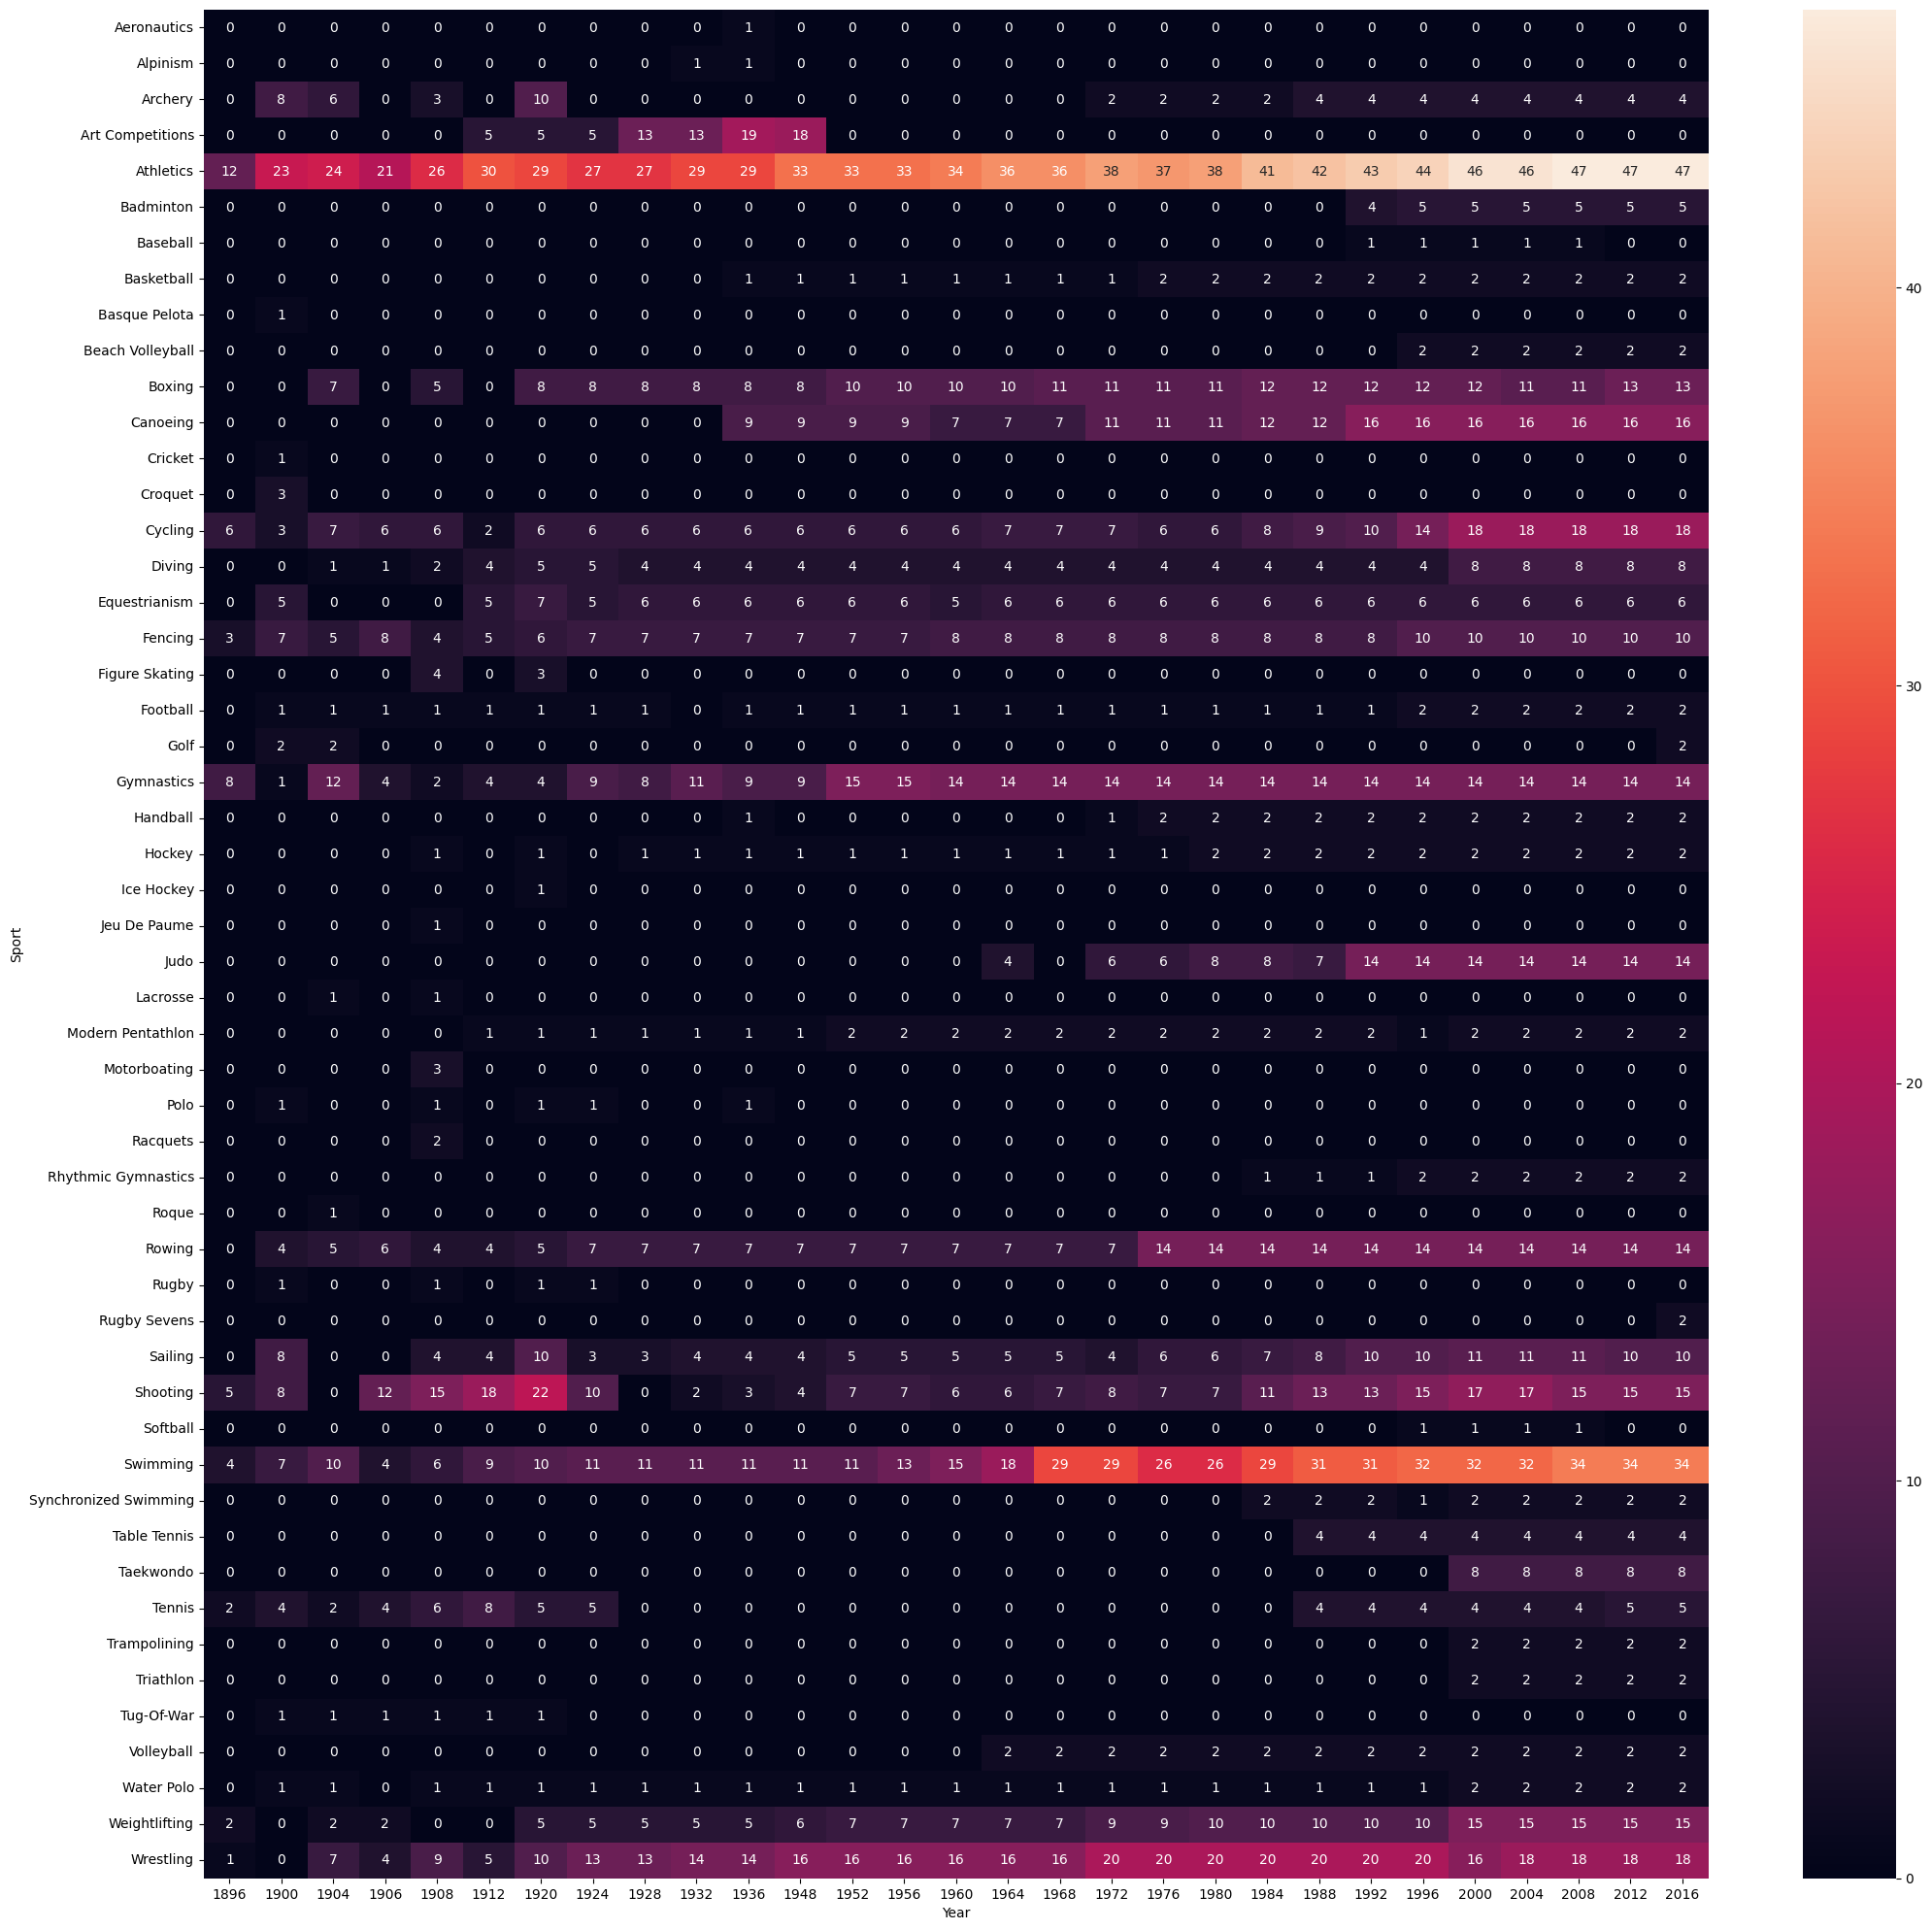

In [35]:
# Removing the duplicate years, events, and sports
df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')
x = df.drop_duplicates(['Year','Sport','Event'])

# plotting the graph
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

**5.3 Country-wise** total **Medals won per Year**

In [36]:
# Removing the null and deuplicate values
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'],inplace=True)
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

# plotting the graph
fig = px.line(final_df, x="Year", y="Medal", title = "Country-wise Medals won per Year", height = 700, width = 1000)
fig.show()

**5.4 Country-wise medals** won in various **Sports per Year Heatmap**

<Axes: xlabel='Year', ylabel='Sport'>

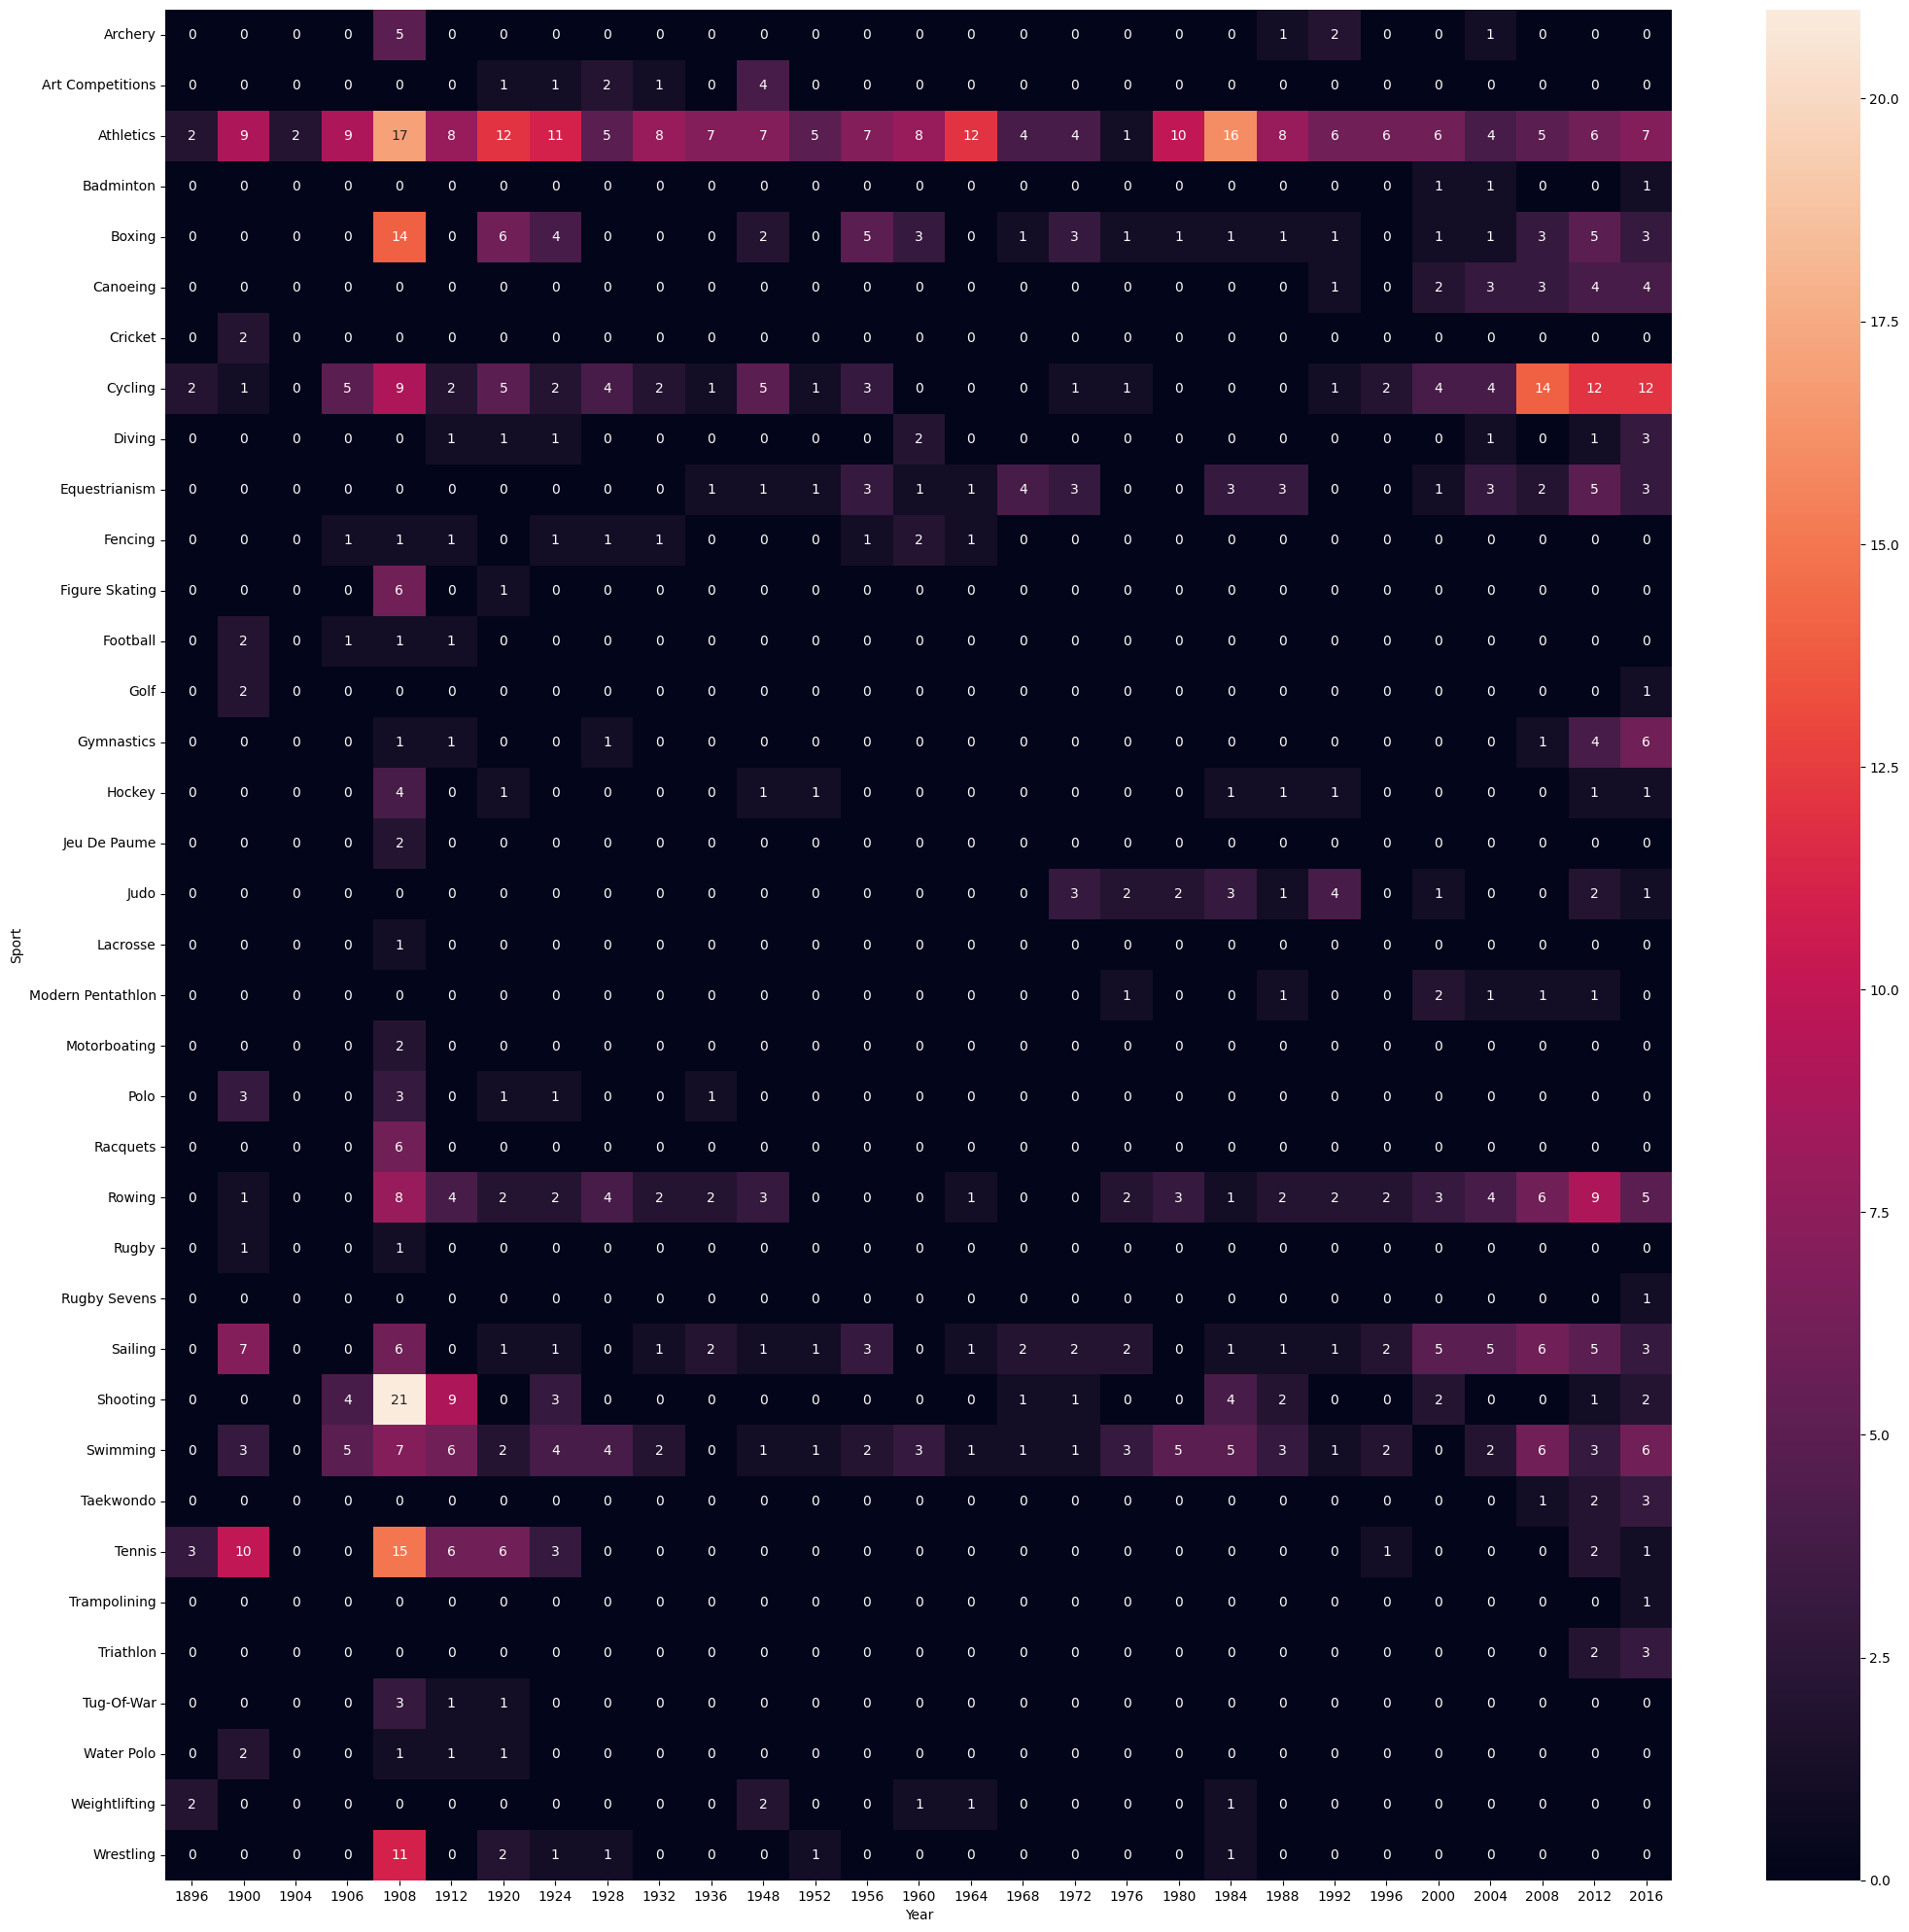

In [37]:
new_df = temp_df[temp_df['region'] == 'UK']

# plotting the heetmap
plt.figure(figsize=(25,25))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

**5.5 Distribution of Age** for **Winning Medals**

In [38]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

# plotting the graph
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=700, title_text = "Distribution of Age for Winning various Medals")
fig.show()

**5.6 Height - Weight** relation for **Winning Medals**

Text(0.5, 1.0, 'Height vs Weight for Winning Medals')

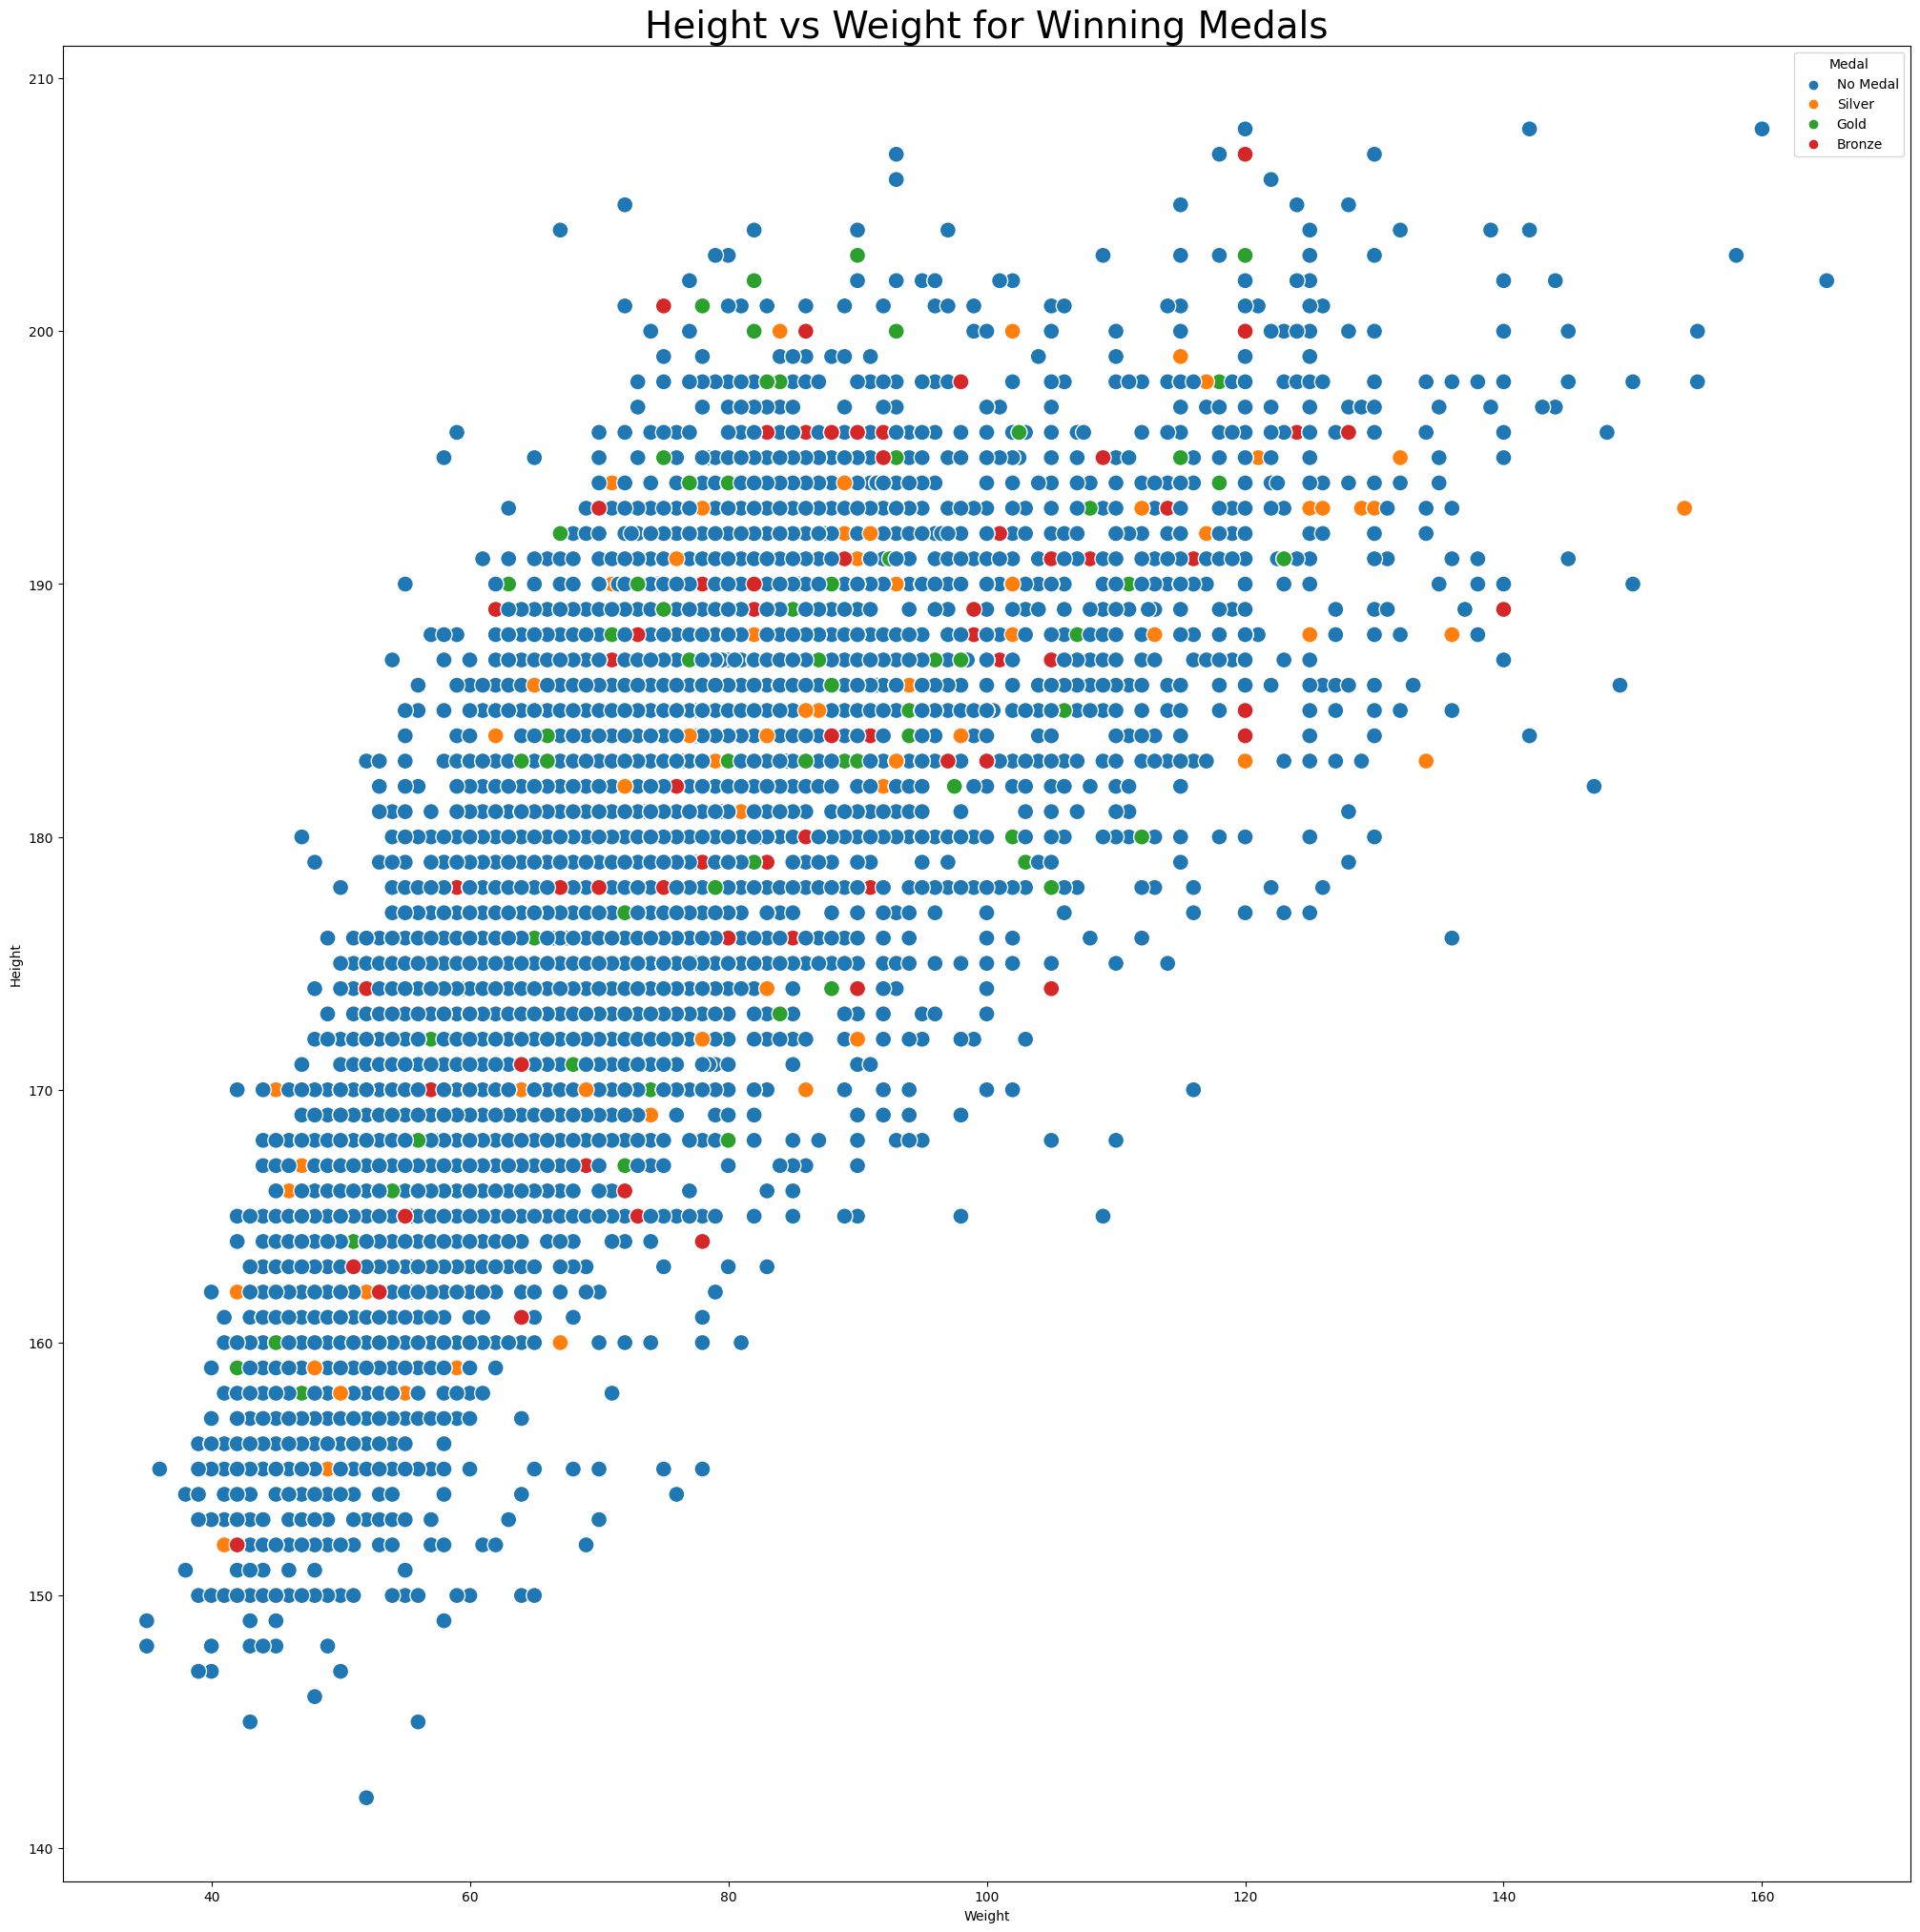

In [39]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

# plotting the scatterplot
plt.figure(figsize=(25,25))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'],hue =temp_df['Medal'],s=150)
plt.title("Height vs Weight for Winning Medals", fontsize=28)

**5.7 Gender ratio** for winning medals over the **Years w.r.t Sports**

Text(0.5, 1.0, 'Gender ratio relation w.r.t Height - Weight for Winning Medals')

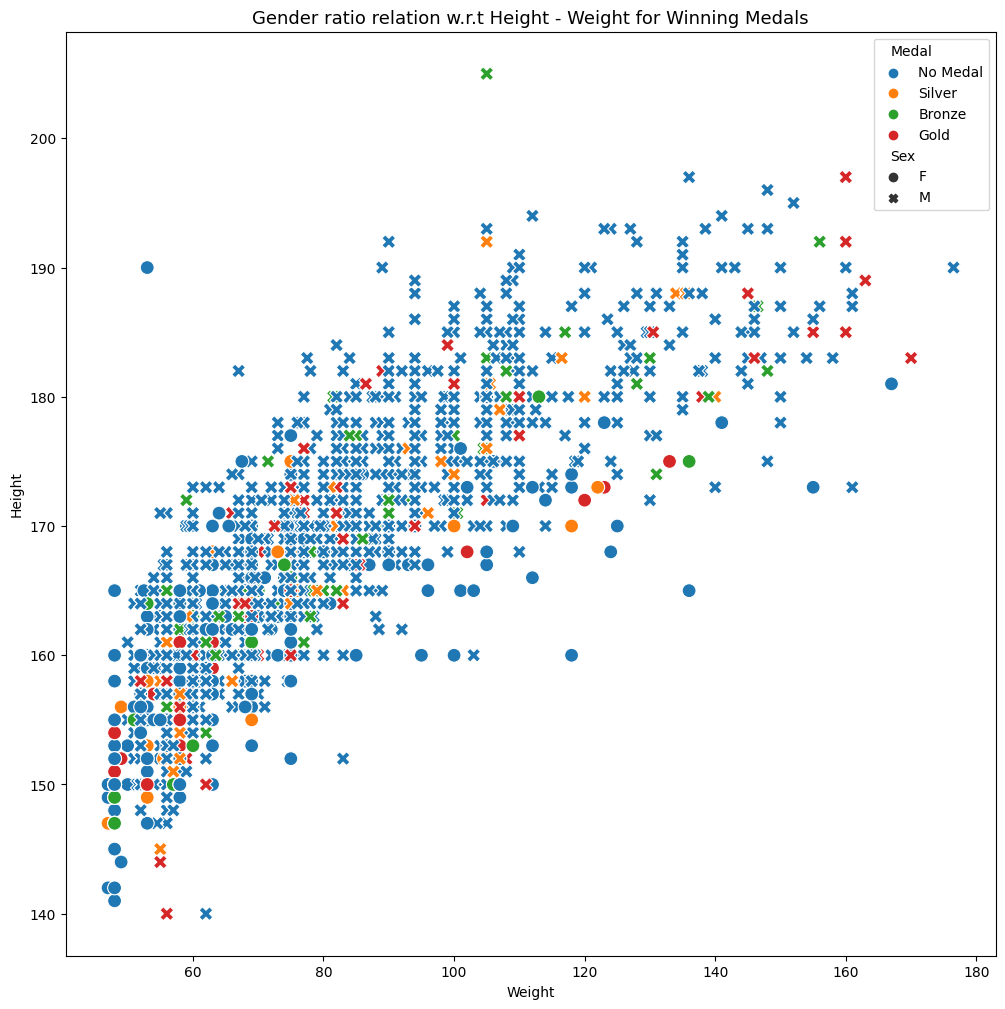

In [40]:
plt.figure(figsize=(12,12))
temp_df = athlete_df[athlete_df['Sport'] == 'Weightlifting']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'],hue =temp_df['Medal'],style=temp_df['Sex'],s=100)
plt.title("Gender ratio relation w.r.t Height - Weight for Winning Medals", fontsize=13)

**5.8 Men Vs Women** Participation Over the **Years**

In [41]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
final = men.merge(women,on='Year',how ='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'}, inplace=True)
final.fillna(0,inplace=True)

# plotting the graph
fig = px.line(final, x='Year', y=['Male','Female'], title = "Men vs Women Participation vs Years", height = 700, width =1000)
fig.show()

In [ ]:
import plotly.io as pio
pio.renderers
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
final = men.merge(women,on='Year',how ='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'}, inplace=True)
final.fillna(0,inplace=True)

# plotting the graph
fig = px.line(final, x='Year', y=['Male','Female'], title = "Men vs Women Participation vs Years", height = 700, width =1000)
fig.show(renderer="svg")